# RUHUL AMIN BARBHUIYA, CSE, 172010007038, BVEC

In [1]:
import numpy as np #n-dimensional array
import pandas as pd #data analysis and manipulation tool
import seaborn as sns #plotting graphs , histograms etc
import matplotlib.pyplot as plt #plotting charts,graphs etc
%matplotlib inline

In [6]:
uber= pd.read_csv("datasets_1026_1855_My Uber Drives - 2016.csv") #loading data from dataset


In [7]:
uber.head() #prints starting 5 rows from the dataset

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [8]:
uber.tail()  #prints ending 5 rows from dataset

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [13]:
uber.info() #displays all info/stats associated with the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
START_DATE*    1156 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1156 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [14]:
uber.isnull().sum() #empty values present

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [15]:
uber = uber[:-1]  # Remove uncessary data

In [16]:
n_col = uber.select_dtypes(include= np.number).columns
print("Numerical column : ",n_col)   #prints all colums having number/numerical value

c_col = uber.select_dtypes(exclude= np.number).columns
print("Character column : ",c_col)    #prints all colums having character

Numerical column :  Index(['MILES*'], dtype='object')
Character column :  Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'PURPOSE*'], dtype='object')


In [18]:
uber.drop(uber.tail(1).index, inplace=True) #dropping the last row since it has all null values and is not required

In [19]:
dpp.isnull().sum()  #prints the sum of null values in rows


START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

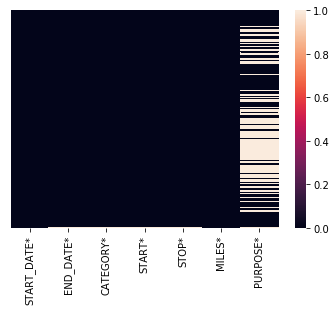

In [20]:
sns.heatmap(dpp.isnull(),yticklabels=False) #plot heatmap of the features using seaborn


In [29]:
uber.describe() #prints all statistics associated with numerical columns


,MILES*,Time,KM
count,1154.000000,1154.000000,1154.000000
mean,10.534229,23.174177,16.949574
std,21.559969,27.228913,34.689991
min,0.500000,0.000000,0.804500
25%,2.900000,10.000000,4.666100
50%,6.000000,16.000000,9.654000
75%,10.400000,27.000000,16.733600
max,310.300000,336.000000,499.272700


In [23]:
uber['START_DATE*']=uber['START_DATE*'].astype('datetime64[ns]')
uber['END_DATE*']=uber['END_DATE*'].astype('datetime64[ns]')

In [24]:
uber['Time'] = uber['END_DATE*']-uber['START_DATE*'] #find time required by substracting the two values
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,01:07:00


In [25]:
uber['Time'] = uber['Time'].dt.total_seconds()/60.0
uber['Time'] = uber['Time'].astype('float')
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [26]:
uber['KM']= uber['MILES*']*1.609 #converted miles to km for better understanding


In [28]:
uber.head()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Time,KM
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,8.2059
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,8.0450
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,7.7232
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,7.5623
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,102.4933


In [30]:
uber.drop(['MILES*'],axis=1) #dropped miles since km is present


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,PURPOSE*,Time,KM
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,Meal/Entertain,6.0,8.2059
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,NaN,12.0,8.0450
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,Errand/Supplies,13.0,7.7232
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,Meeting,14.0,7.5623
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,Customer Visit,67.0,102.4933
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,Meal/Entertain,4.0,6.9187
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,Meeting,5.0,11.4239
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,Meeting,6.0,1.2872
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,Meeting,20.0,13.3547
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,Customer Visit,27.0,26.5485


In [33]:
uber['speed']=(uber['KM']/uber['Time'])*60  #time:min & speed:kmph


In [35]:
uber.head()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Time,KM,speed
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,8.2059,82.059000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,8.0450,40.225000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,7.7232,35.645538
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,7.5623,32.409857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,102.4933,91.785045


In [36]:
uber.tail()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Time,KM,speed
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,4.0,1.2872,19.308000
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,1.1263,9.654000
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,6.2751,20.917000
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,26.0658,44.684229
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,10.2976,34.325333


In [37]:
#HOUR DAY TRANSFORMATION

In [38]:
import datetime
import calendar

In [39]:
uber['START_DATE*'] = pd.to_datetime(uber['START_DATE*'], format="%m/%d/%Y %H:%M") 
uber['END_DATE*'] = pd.to_datetime(uber['END_DATE*'], format="%m/%d/%Y %H:%M")

In [40]:
hour=[]  #empty list
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in uber['START_DATE*']:
    hour.append(x.hour) #adding/appending the values to above empty list
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
uber['HOUR']=hour #creatig columns
uber['DAY']=day
uber['DAY_OF_WEEK']=dayofweek
uber['MONTH']=month
uber['WEEKDAY']=weekday

In [41]:
uber.head() #updated dataset


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Time,KM,speed,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,8.2059,82.059000,21,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,8.0450,40.225000,1,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,7.7232,35.645538,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,7.5623,32.409857,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,102.4933,91.785045,14,6,2,1,Wednesday


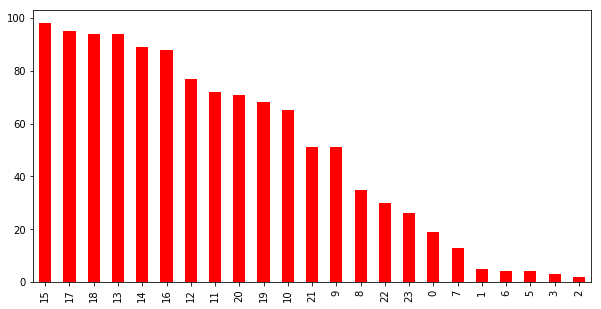

In [42]:
uber['HOUR'].value_counts().plot(kind='bar',figsize=(10,5),color='red') #trips per hour


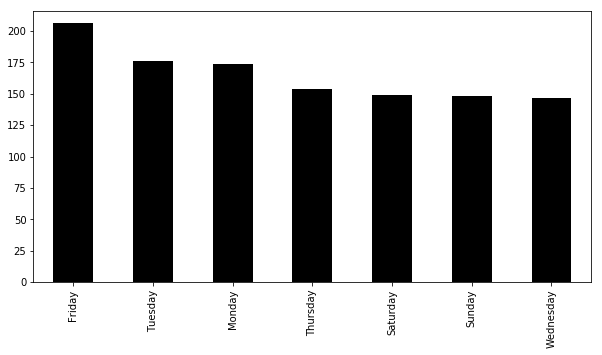

In [43]:
uber['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='black') #trips per day of week


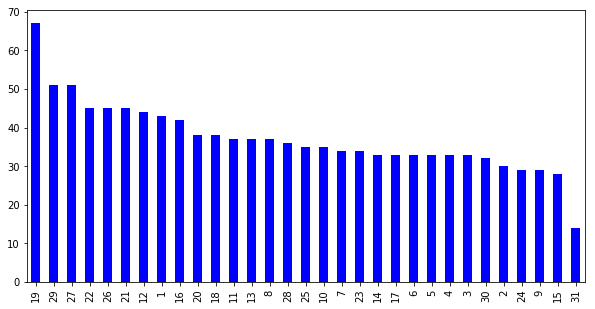

In [44]:
uber['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue') #trips per day of the month


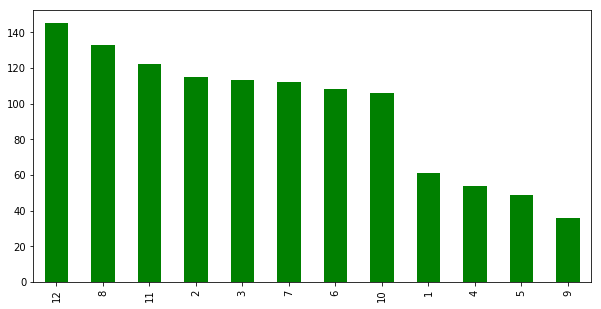

In [45]:
uber['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='green') #trips in month, month 12 has highest number of trips as depicted in the figure


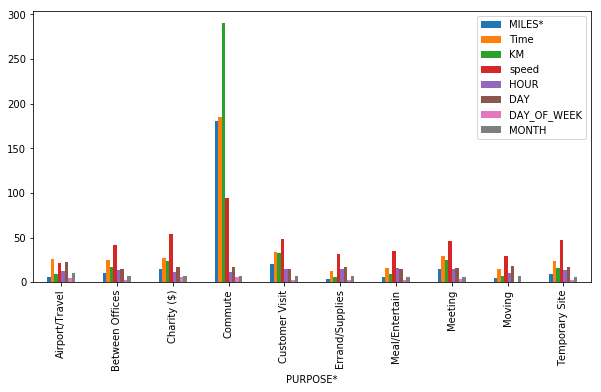

In [46]:
uber.groupby('PURPOSE*').mean().plot(kind='bar',figsize=(10,5)) #overall analysis
